In [1]:
#GOAL: Create a model to predict whether or not a customer will Churn.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

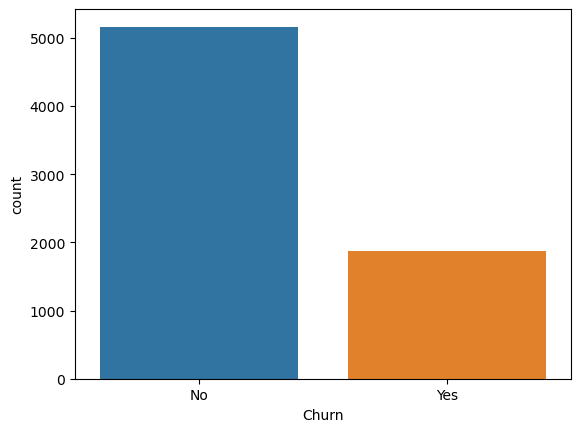

In [9]:
# Display the balance of the class labels (Churn) with a Count Plot.
sns.countplot(data=df,x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

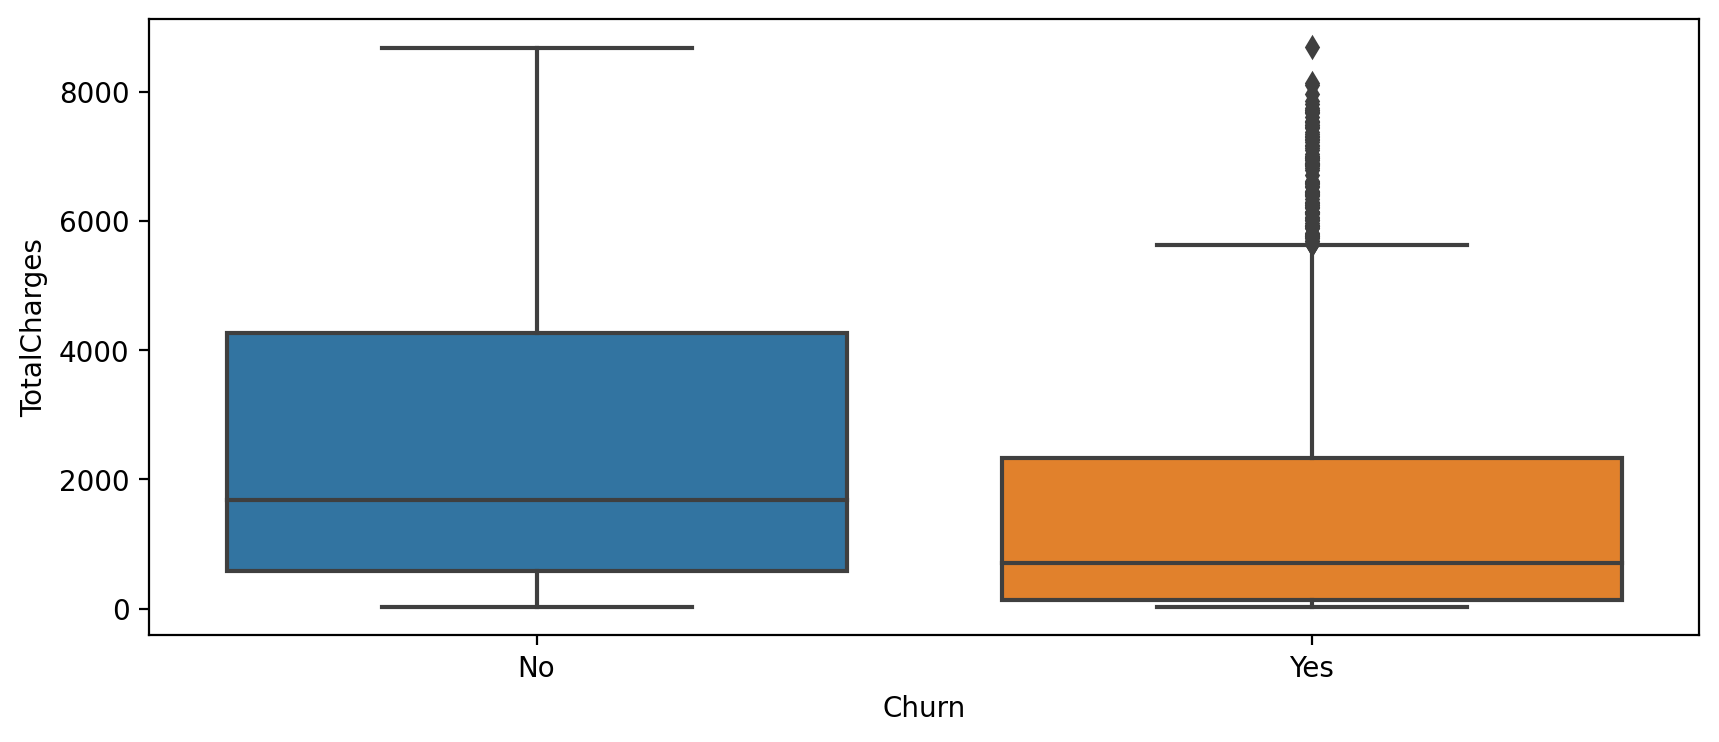

In [14]:
# Explore the distrbution of TotalCharges between Churn categories with a Box Plot and Violin Plot.
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x='Churn',y='TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

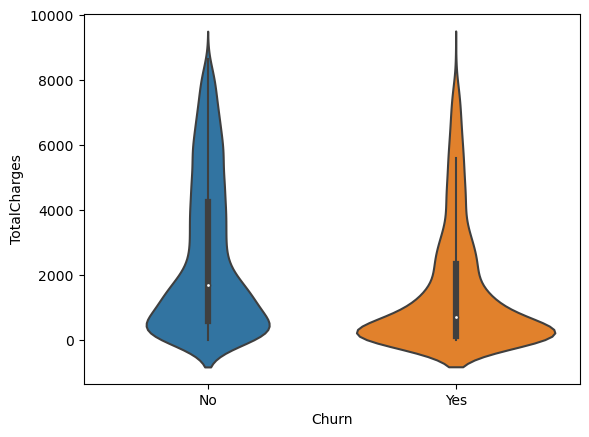

In [11]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

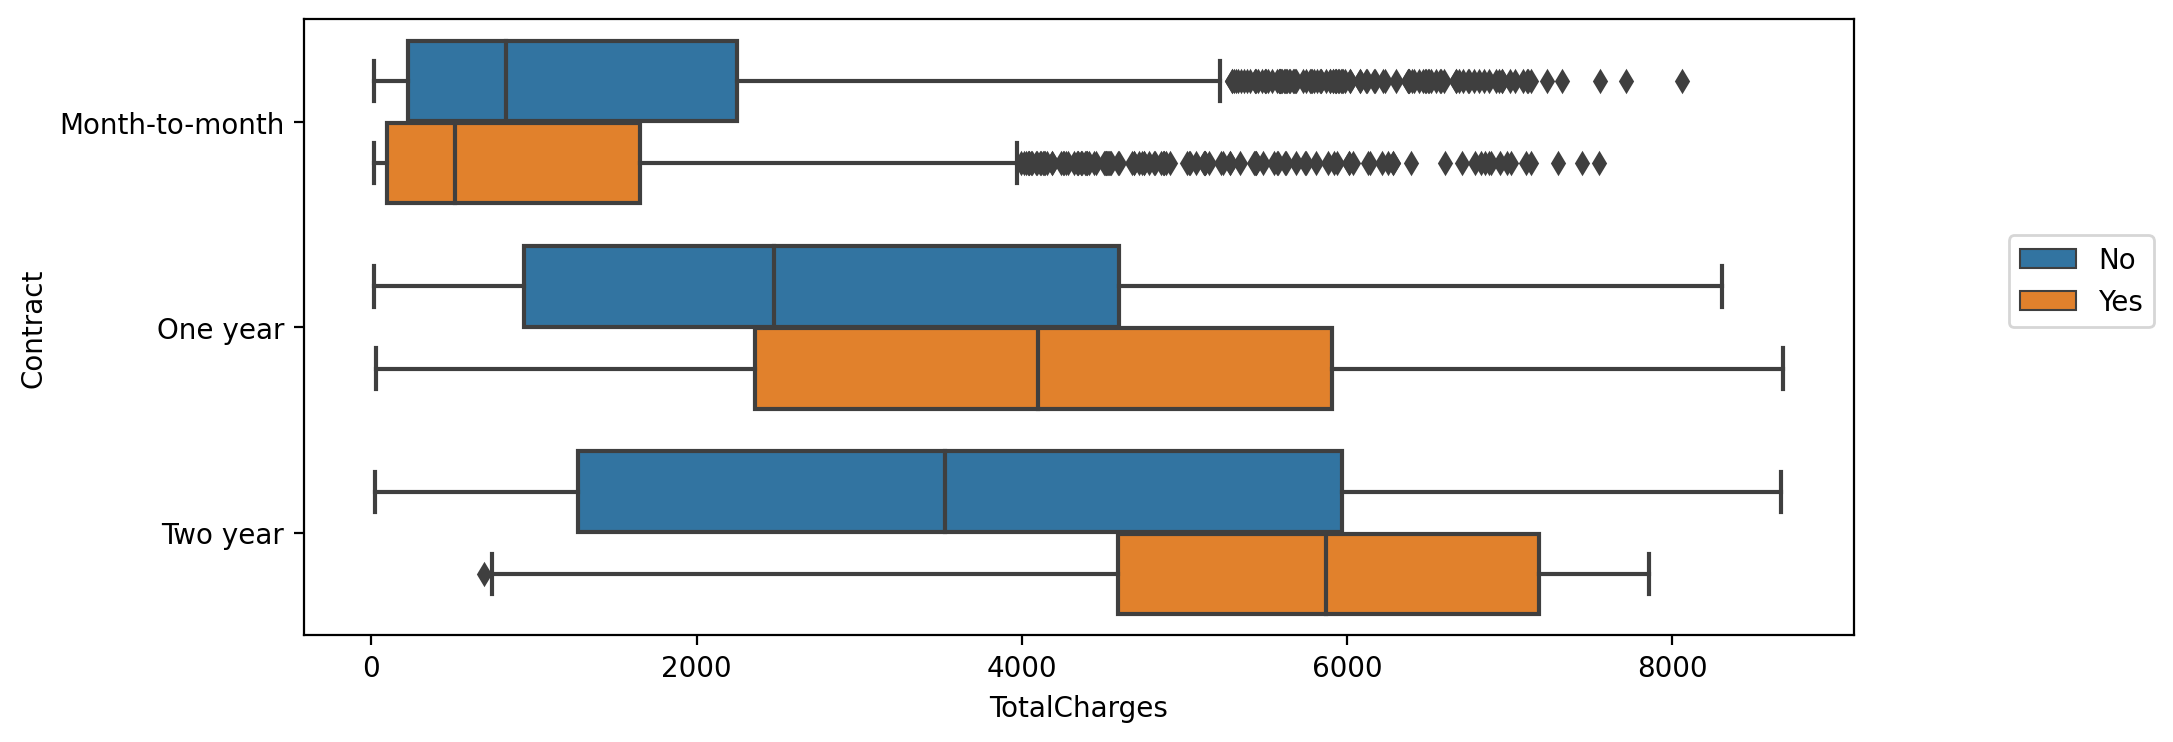

In [20]:
#Create a boxplot showing the distribution of TotalCharges per Contract type, 
#also add in a hue coloring based on the Churn class.

plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x='TotalCharges',y='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

In [29]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

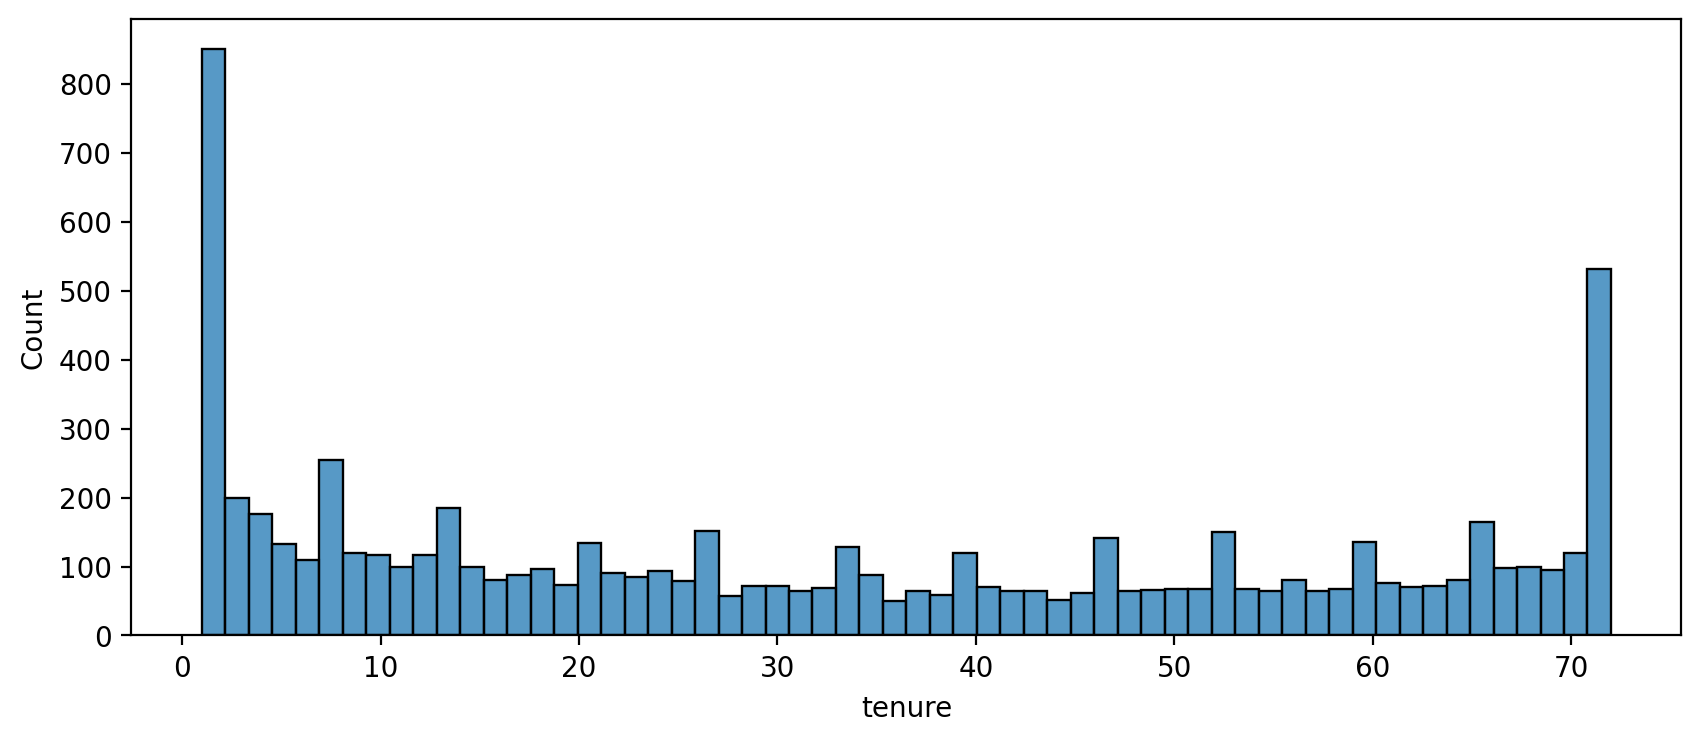

In [34]:
#Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a 
#customer was or has been on a customer.

plt.figure(figsize=(10,4),dpi=200)
sns.histplot(df['tenure'],bins=60)

<Figure size 2000x800 with 0 Axes>

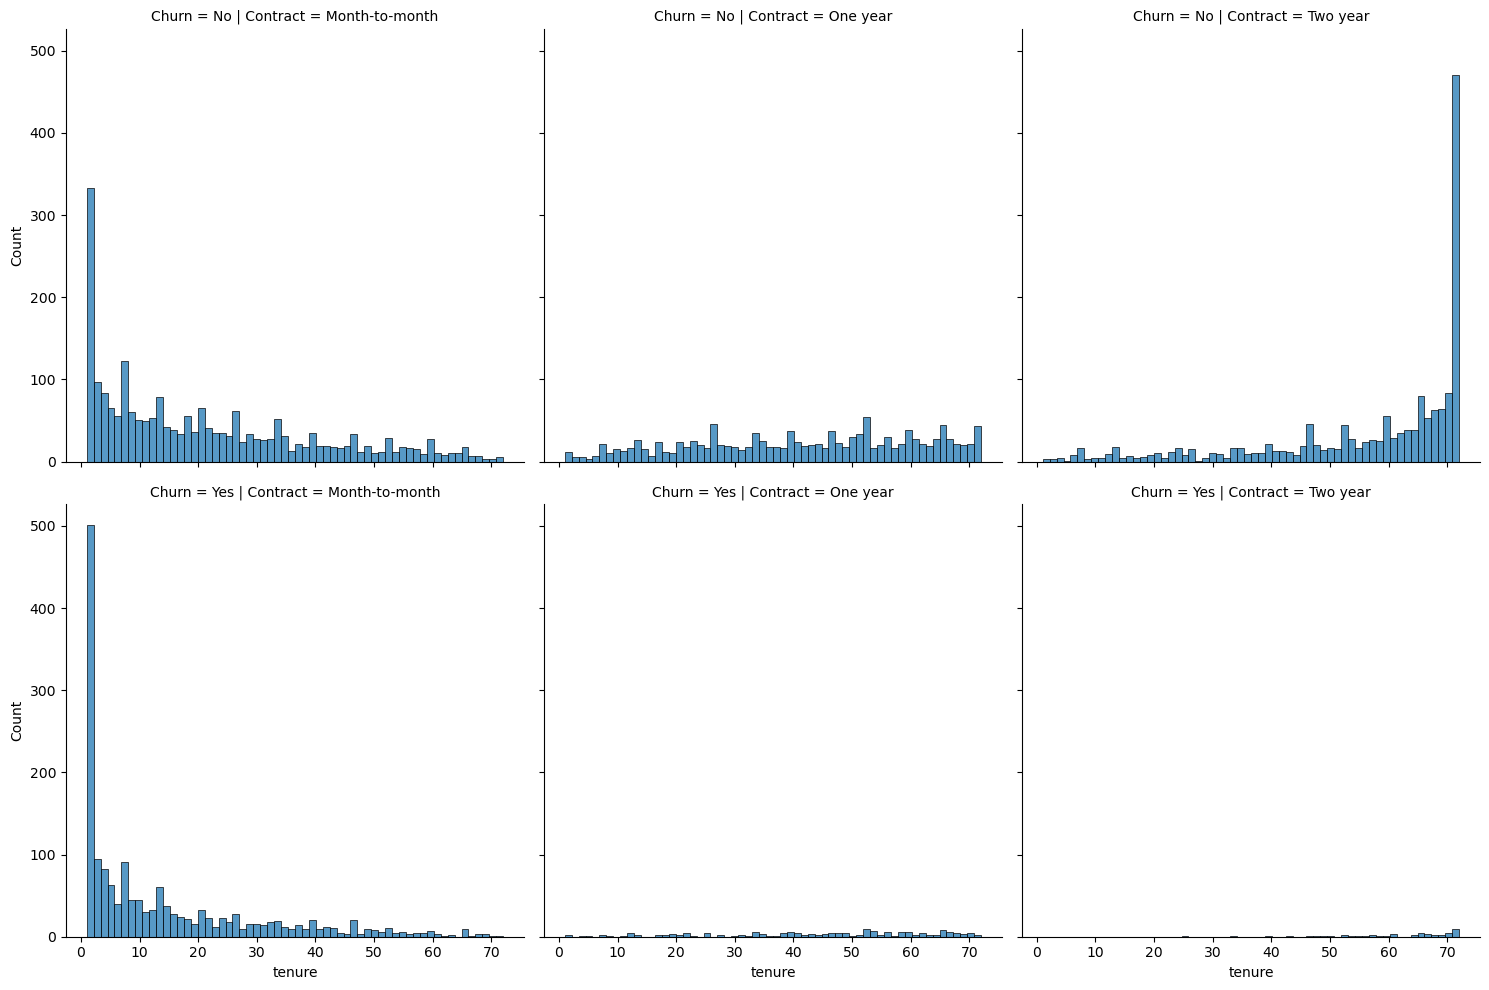

In [40]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=df,x='tenure',row='Churn',col='Contract',multiple='stack',bins=60)

In [ ]:
#Predictive Modeling

# I will explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.

In [45]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [46]:
y=df['Churn']

In [ ]:
# Perform a train test split, holding out 10% of the data for testing.I'll use a random_state of 101

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [52]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

In [66]:
model=DecisionTreeClassifier(max_depth=10,criterion='entropy',max_leaf_nodes=8)

In [67]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=8)

In [68]:
pred=model.predict(X_test)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.84      0.95      0.89       557
         Yes       0.60      0.30      0.40       147

    accuracy                           0.81       704
   macro avg       0.72      0.62      0.64       704
weighted avg       0.79      0.81      0.79       704



In [76]:
accuracy_score(y_test,pred)

0.8125

In [77]:
from sklearn.tree import plot_tree

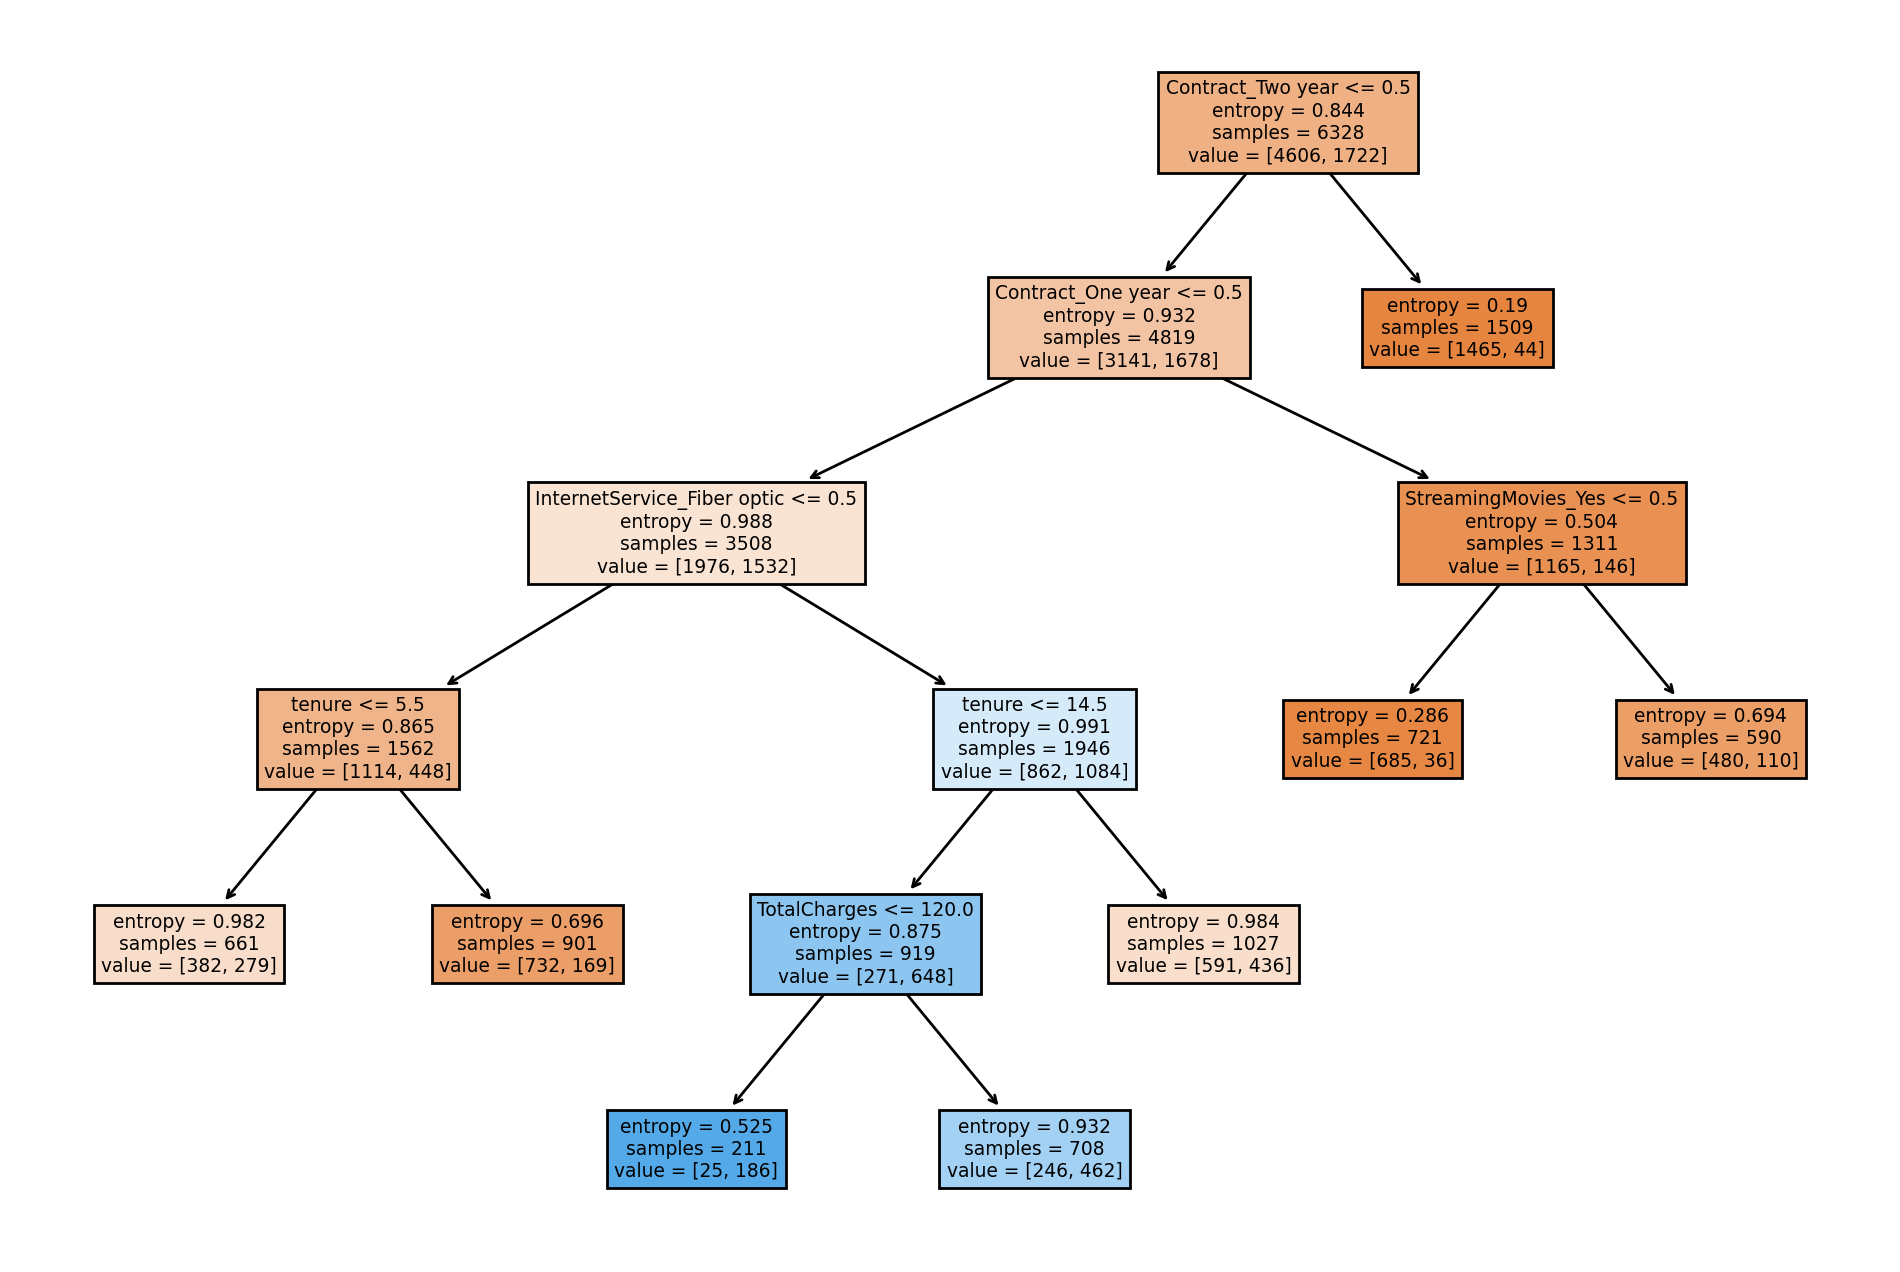

In [78]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,feature_names=X.columns,filled=True);

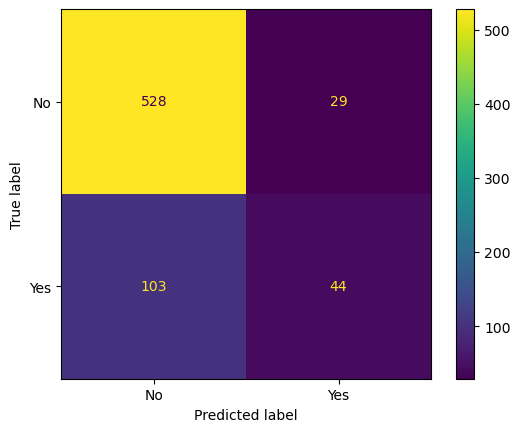

In [79]:
plot_confusion_matrix(model,X_test,y_test)

In [82]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


In [83]:
from sklearn.model_selection import GridSearchCV

In [89]:
n_estimators=[64,100,128]
bootstrap=[True,False]
oob_score=[True,False]
max_features=[4,6,8,10,12]

In [90]:
rfc=RandomForestClassifier()

In [91]:
param_grid={'n_estimators':n_estimators,'bootstrap':bootstrap,'oob_score':oob_score,'max_features':max_features}

In [92]:
grid=GridSearchCV(rfc,param_grid)

In [93]:
grid.fit(X_train,y_train)

C:\Users\97150\Anaconda3\envs\new_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\97150\Anaconda3\envs\new_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\97150\Anaconda3\envs\new_env\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\97150\Anaconda3\envs\new_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\97150\Anaco

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [4, 6, 8, 10, 12],
                         'n_estimators': [64, 100, 128],
                         'oob_score': [True, False]})

In [94]:
y_pred=grid.predict(X_test)

In [95]:
grid.best_params_

{'bootstrap': True, 'max_features': 6, 'n_estimators': 100, 'oob_score': True}

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.46      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



In [97]:
accuracy_score(y_test,y_pred)

0.7897727272727273

In [99]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

In [126]:
adb=AdaBoostClassifier(n_estimators=100)

In [127]:
adb.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [128]:
preds=adb.predict(X_test)

In [129]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [130]:
accuracy_score(y_test,preds)

0.8366477272727273

In [131]:
confusion_matrix(y_test,preds)

array([[511,  46],
       [ 69,  78]], dtype=int64)

In [147]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [178]:
gbc=GradientBoostingClassifier(n_estimators=200)

In [179]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [180]:
y_preds=gbc.predict(X_test)

In [181]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.58      0.49      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [182]:
accuracy_score(y_test,y_preds)

0.8181818181818182

In [183]:
confusion_matrix(y_test,y_preds)

array([[504,  53],
       [ 75,  72]], dtype=int64)